## Grid data from a file

Data is organized as either row major or column major order. C uses row major, Fortran and Matlab use column major. The sealevel data is organized in column major order.
<img src = "Row_and_column_major_order.png">

In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

#The file is organized in column major format, but read from the file as a single column
dem = np.loadtxt('data/sealevel.txt',skiprows=1)
print("Number of points read = ", len(dem))

#Reshape the 1D data vector into a 2D matrix, there are 121 values per column
#The -1 means the second dimension #columns will be determined automatically
#Fortran uses column major format, thus order is 'F'  (default is row major order)
#https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.reshape.html
z = np.reshape(dem,(121,-1), order='F')
print(z)  #compare to the file to confirm data read correctly


Number of points read =  36421
[[  279.   259.   272. ... -4631. -4596. -4566.]
 [  267.   245.   261. ... -4636. -4601. -4585.]
 [  283.   238.   279. ... -4604. -4604. -4605.]
 ...
 [  -44.   -47.   -62. ... -5430. -5444. -5454.]
 [  -44.   -47.   -61. ... -5400. -5427. -5438.]
 [  -44.   -48.   -59. ... -5397. -5400. -5424.]]


In [2]:
#create a grid (note if you don't take transpose then commented line works)
#The upper left corner has the first elevation, which is (0,120)
x,y = np.meshgrid(np.linspace(0,300,301),np.linspace(120,0,121))


<a list of 13 text.Text objects>

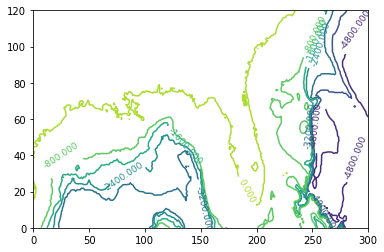

In [3]:
#Create a contour map and see if you recognize the location
cp = plt.contour(x, y, z)

#Add countour line labels
plt.clabel(cp, inline=True, fontsize=9)


<a list of 13 text.Text objects>

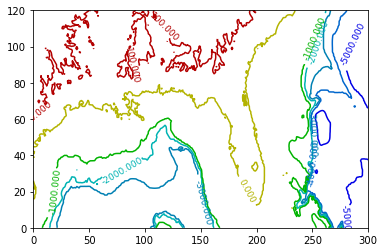

In [4]:
#%matplotlib qt5
#Can you change the contour interval?  colors?
interval=(-5000, -4000, -3000, -2000, -1000, 0, 100)
#First a simple contour plot, one color per contour line
colors = [(0, 0, .9), (0, .4, .8), (0, .5, .7),   (0, .7, .7), (0, .7, 0),  (.7, .7, 0), (.7,0,0)]
cp = plt.contour(x, y, z, interval, colors = colors)

#Add countour line labels
plt.clabel(cp, inline=True, fontsize=9)

## Shaded surface example
Note IPython magic command %matplotlib qt5 creates a separate image window with basic interaction. For info on PyQt5: https://pypi.org/project/PyQt5/

In [5]:
%matplotlib qt5
from matplotlib.colors import LightSource
ls = LightSource(azdeg=270, altdeg=80)  
cmap=cm.terrain
plt.clf()
cp = plt.contour(x, y, z, (0), colors = 'k')
im = plt.imshow(ls.shade(z, cmap=cmap, vert_exag=.5, blend_mode='hsv'),extent=(0,300,0,120))

## Colors
Color maps can be created from a list of colors

PowerNorm changes how the colors are distributed. Note when gamma = 4 a larger range of lower elevations (-2000 to -5000) are colored blue and small range of higher elevations (0 to 200) are colored with yellow, orange and red. 

Try a gamma = 1 (linear normalization) to see how it differs. 

https://matplotlib.org/3.1.1/api/colors_api.html

In [9]:
from matplotlib.colors import LinearSegmentedColormap, PowerNorm

# Plot the surface.
fig = plt.figure()
ax = plt.axes(projection='3d',adjustable='box')
ax.set_aspect('equal')
norm = PowerNorm(4, vmin=-5500,vmax=500)
colors=[( 0.2315788, 0, 1),
  (0.04210508, 0, 1),
  (0,    0.1473687,            1),
  (0,    0.3368421,            1),
  (0,    0.5263158,            1 ),
  (0,    0.7157896,            1 ),
  (0,    0.9178947,            1 ),
  (0,            1,    0.8799999 ),
  (0,            1,    0.6778948 ),
  (        0,            1,    0.4757894 ),
  (       0,            1,    0.2736843 ),
  (      0,            1,   0.04631591 ),
  (0.1810526,            1,            0 ),
  ( 0.408421,            1,            0 ),
  ( 0.6357894,            1,            0 ),
  ( 0.8631579,            1,            0 ),
  (         1,    0.9094737,            0 ),
  (         1,    0.6821053,            0 ),
  (         1,    0.4547368,            0 ),
  (         1,    0.2273684,            0 ),
  (        1,            0,            0)]
cmap = LinearSegmentedColormap.from_list('MyMap',colors,256)
surf = ax.plot_surface(x, y, z, cmap=cmap, norm=norm, antialiased=False)
ax.contour(x,y,z)

#Annotation
#fig.colorbar(surf)
ax.set_title('Surface Map')
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()


ValueError: Unknown projection '3d'

## 3D surface that can be rotated
Rotate with left mouse button and zoom with right button (requires qt5).

Some examples - https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

In [10]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

#The file is organized in column major format, but read as a single column
dem = np.loadtxt('data/sealevel.txt',skiprows=1)

#reshape the 1D data vector into a 2D matrix
z = np.reshape(dem,(121,-1), order='F')

#create a grid (note if you don't take transpose then commented line works)
#y,x = np.meshgrid(np.linspace(120,0,121),np.linspace(0,300,301))
#The upper left corner has the first elevation, which is (0,120)
x,y = np.meshgrid(np.linspace(0,300,301),np.linspace(120,0,121))

#Set up 3D figure
fig = plt.figure()
ax = fig.gca(projection='3d')

#Set the initview - a 0 azimuth is from the east, -90 is from the south
#And set the aspect so x and y intervals appear the same
ax.view_init(65,-80)
ax.set_aspect('equal')
surf = ax.plot_surface(x,y,z, cmap=cm.terrain,
                       linewidth=0, antialiased=False)

NotImplementedError: It is not currently possible to manually set the aspect on 3D axes